In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# - 한셀안의 인쇄동작을 모두 수행
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# - matplotlib 초기 설정(한글 폰트 설정)
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
mpl.rc('font',size=16) # 전체 폰트 지정

# << 타이타닉 데이터 >>
## [0] titanic_train.csv 파일을 확인하라
- 타이타닉 호 침몰 당시의 승객 명단 데이터로 생존자의 생사여부와 다른 데이터들 간의 연관성을 분석하여 생존에 영향을 미치는 요소를 비교 분석용도로 사용되는 데이터 셋이다
- titanic 데이터는 캐글 사이트(https://www.kaggle.com/c/titanic/data)   에서 'train.csv'파일을 다운로드 받을 수 있다
- 컬럼 의미   
Survived: 생존 여부  
pclass: 티켓 등급   
Name : 이름   
Sex: 성별  
Age: 나이  
Sibsp: 함께 탑승한 형제자매, 배우자의 수  
Parch: 함께 탑승한 부모, 자식의 수  
Ticket: 티켓 번호  
Fare: 운임  
Cabin: 객실 번호  
Embarked: 탑승 항구( C = Cherbourg, Q = Queenstown, S = Southampton)  

In [2]:
df_tit = pd.read_csv('titanic_train.csv')
df_tit.info()
df_tit.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### 실습에 사용할 df를 확인하라
- df_tit에서 생존여부, 선실등급, 이름, 성별, 나이 5개의 컬럼만 가져온 df이다
- describe()로 수치형 컬럼의 분포도를 확인한다

In [3]:
df = df_tit.iloc[:, [1,2,3,4,5] ]
df.describe()
df.head()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0


## [1] 60세 이상 생존자의 정보를 행단위로 추출하라
- 생존자의 경우는 Survived 컬럼의 값이 1이다(다음 그림 참고)   
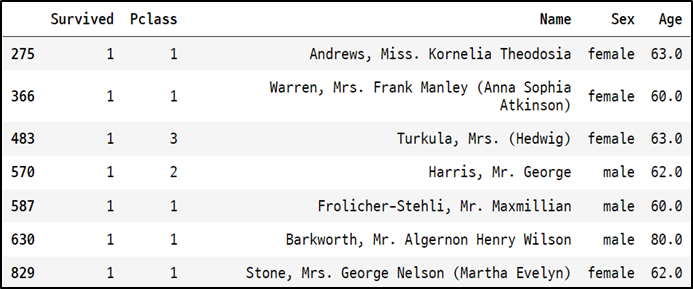

In [5]:
# [1] 코드 작성
df[ (df['Survived']==1) & (df['Age']>=60) ]

,Survived,Pclass,Name,Sex,Age
275,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0
366,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0
483,1,3,"Turkula, Mrs. (Hedwig)",female,63.0
570,1,2,"Harris, Mr. George",male,62.0
587,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0


## [2] 나이가 20대인 인원수를 구하라
- 20 ~ 29세 사이의 인원수는 220명이다

In [30]:
# [2] 코드 작성
# df[ (20 <= df['Age'] < 30) ].count()
df.loc[ (df['Age']>=20) & (df['Age'] < 30) , 'Age'].count()

220

## [3] 'Name'에서 호칭이 'Miss'인 여성중 생존자의 인원수를 인쇄하라
- 결과는 127이 인쇄되어야 한다

In [31]:
# [3] 코드 작성
df.loc[df['Name'].str.contains('Miss') & df['Survived']==1, 'Name'].count()

127

## [4] 연령대를 아동과 성인으로 구분하여 생존자수 비교하라
1. 18세미만과 이상으로 'child'과 'adult'로 구분하여 'Age2'컬럼을 추가하라
2. 생존자중에서 'Age2'컬럼으로 인원 빈도 집계한다
- 다음 그림 참고(Age2추가된 결과는 일부임)
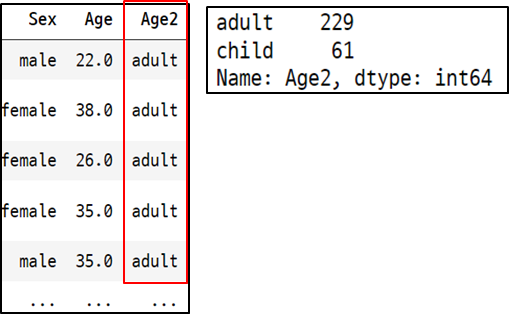
- 참고) 인덱싱방법으로 수정시 SettingWithCopyWarning이 발생할 경우
    pd.set_option('mode.chained_assignment',  None) 로 경고를 끈다

In [24]:
# 편집시 경고발생할 경우 해제 방법 
pd.set_option('mode.chained_assignment',  None) # 경고 끔

In [32]:
# [4] 코드 작성
df.loc[df['Age']>=18, 'Age2'] = 'adult'
df.loc[df['Age']<18, 'Age2'] = 'child'
df
df.loc[df['Survived']==1, 'Age2'].value_counts()

,Survived,Pclass,Name,Sex,Age,Age2
0,0,3,"Braund, Mr. Owen Harris",male,22.0,adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,adult
4,0,3,"Allen, Mr. William Henry",male,35.0,adult
...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,adult
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,adult
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0,adult


adult    229
child     61
Name: Age2, dtype: int64

## [5] 나이 정보가 누락된 사람들의 선실 및 성별 분포도를 확인하라
###  df의 'Age' 컬럼에서 누락된 자료만 추출하여 선실(Pclass) 및 성별(Sex) 인원 집계하라
- 다음 그림을 참고(일부)
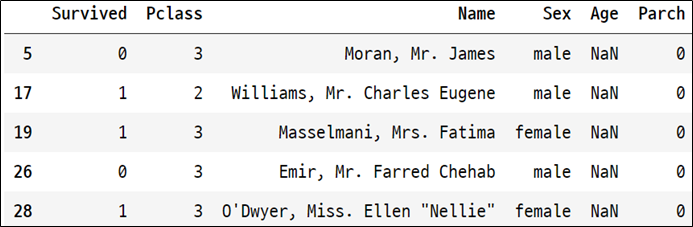
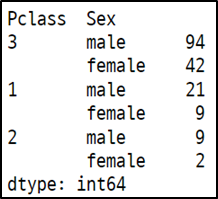

In [59]:
# [5] 코드 작성
df.loc[df['Age'].isna() ,['Pclass','Sex']].value_counts()
# df.loc[df['Age'].isna() ,['Pclass','Sex']].count()
# df.loc[df['Age'].isna() ,['Pclass','Sex']]

Pclass  Sex   
3       male      94
        female    42
1       male      21
        female     9
2       male       9
        female     2
dtype: int64

Pclass    177
Sex       177
dtype: int64